In [1]:
# 기본 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

import matplotlib.font_manager as fm 
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font",family=font_name)

mpl.rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

#pip install mglearn
import mglearn      # 머신러닝 학습을 위한 모듈
import sklearn.datasets as datasets
import sklearn.metrics 


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB #이산데이터 
from sklearn.metrics import accuracy_score #성능측정
from sklearn.naive_bayes import BernoulliNB #베르누이

## Naive Bayes
    - 선형 모델과 유사(LogistR
    - 훈련속도가 빠르지만 일반화 성능이 조금 뒤쳐진다
    - 연속적인 데이터 : GaussianNB, 이산 데이터 : BernoulliNB,MultinomialNB
    - alpha 파라미터를 통해 복잡도를 조절

In [7]:
# GaussianNB
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size = 0.2)

In [2]:
from sklearn.naive_bayes import GaussianNB

In [9]:
model = GaussianNB().fit(X_train, y_train)
pred = model.predict(X_test)

In [12]:
print(sklearn.metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.83      0.91        12
           2       0.80      1.00      0.89         8

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [3]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

In [4]:
df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


# 열의 텍스트 특성값들을 간략하게 숫자로 나타낼때
# map 함수

In [5]:
df["label"] = df["type"].map({"positive":1, "negative":0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [6]:
df_x = df["movie_review"]
df_y = df["label"]

In [8]:
df_y

0    1
1    1
2    1
3    1
4    1
5    0
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [9]:
# 입력데이터는 고정된 크기의 벡터로써, 각각의 인덱스는 단어의 빈도수로 구분

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB #이산데이터 
from sklearn.metrics import accuracy_score #성능측정

In [12]:
cv = CountVectorizer()
x_traincv = cv.fit_transform(df_x)
print(x_traincv)

  (0, 30)	1
  (0, 15)	1
  (0, 13)	2
  (0, 19)	1
  (0, 35)	1
  (0, 33)	1
  (0, 1)	1
  (1, 30)	1
  (1, 19)	1
  (1, 16)	1
  (2, 30)	1
  (2, 19)	1
  (2, 3)	1
  (2, 14)	1
  (2, 36)	1
  (3, 15)	1
  (3, 19)	1
  (3, 8)	2
  (3, 20)	1
  (3, 7)	1
  (3, 2)	1
  (3, 26)	1
  (3, 29)	1
  (4, 19)	1
  (4, 29)	1
  :	:
  (6, 30)	2
  (6, 19)	1
  (6, 35)	1
  (6, 25)	1
  (6, 24)	1
  (6, 18)	1
  (6, 21)	2
  (6, 34)	1
  (6, 12)	1
  (6, 9)	1
  (7, 30)	1
  (7, 19)	1
  (7, 16)	1
  (7, 10)	1
  (7, 22)	1
  (8, 30)	1
  (8, 19)	1
  (8, 16)	1
  (8, 14)	1
  (8, 10)	1
  (8, 22)	1
  (8, 0)	1
  (9, 19)	1
  (9, 6)	2
  (9, 28)	1


In [11]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [13]:
cv.inverse_transform(encoded_input[0]) #역으로 백터를 문자화 시키는 함수 inverse_transform

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [14]:
cv.get_feature_names()


['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [15]:
mnb = MultinomialNB()
y_train = df_y.astype("int")
mnb.fit(x_traincv, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]

test_df = pd.DataFrame(test_feedback_list)
test_df["label"] = test_df["type"].map({"positive":1, "negative":0})
test_x = test_df["movie_review"]
test_y = test_df["label"]

In [17]:
x_testcv = cv.transform(test_x)
x_testcv

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [18]:
pred = mnb.predict(x_testcv)
pred

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [19]:
accuracy_score(test_y, pred)

1.0

In [ ]:
# 베르누이 

In [20]:
from sklearn.naive_bayes import BernoulliNB

In [22]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]
# df["label"] = df["spam"].map({"True":1, "False":0})
# df

In [32]:
df = pd.DataFrame(email_list)
df["label"] = df["spam"].map({True:1, False:0})
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [33]:
df_x = df["email title"]
df_y = df["label"]

# binary = True 인자로하면 텍스트를 벡터화할때
# 단어빈도수가아닌 단어 나왔는지 안나왔는지

In [34]:
# 입력데이터는 고정된 크기의 벡터로써, 0과 1로 구분
cv = CountVectorizer(binary = True) # 0이냐 1이냐로 해주는 
x_traincv = cv.fit_transform(df_x)
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [35]:
cv.inverse_transform(encoded_input[0])
cv.get_feature_names()

['attached',
 'card',
 'cheapest',
 'credit',
 'deal',
 'flight',
 'free',
 'game',
 'limited',
 'meeting',
 'offer',
 'only',
 'schedule',
 'statement',
 'time',
 'today',
 'your']

In [36]:
bnb = BernoulliNB()
y_train = df_y.astype("int")
bnb.fit(x_traincv, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [37]:
test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

test_df = pd.DataFrame(test_email_list)
test_df["label"] = test_df["spam"].map({True :1, False :0})
test_x = test_df["email title"]
test_y = test_df["label"]
x_testcv = cv.transform(test_x)

In [38]:
pred = bnb.predict(x_testcv)
pred

array([1, 1, 1, 0, 0, 1])

In [39]:
accuracy_score(test_y, pred)

0.8333333333333334

# k-means, d-scan, PCA
- a. randomly select centroid 랜덤
- b manually assign centroid
- c. kmean++
3) 클러스터링 응용 사례
1. 페이스북 광고 : 특정 소비자 그룹에 적합한 광고 선택
2. 센서 빅데이터 그룹화
3. 이미지 분류 작업
4. 네트워크 유해 트래픽 감지
5. 언제 어디서 범죄가 발행할지 예측하여 예측 결과에 따라 순찰차 배치
6. 설문조사에 따른 소비자의 성향 분류
7. 뉴스, 문서 검색 결과의 주제별 분류
8. 공시지가 유사가격 권역 설정

# 비지도 학습

### K-means

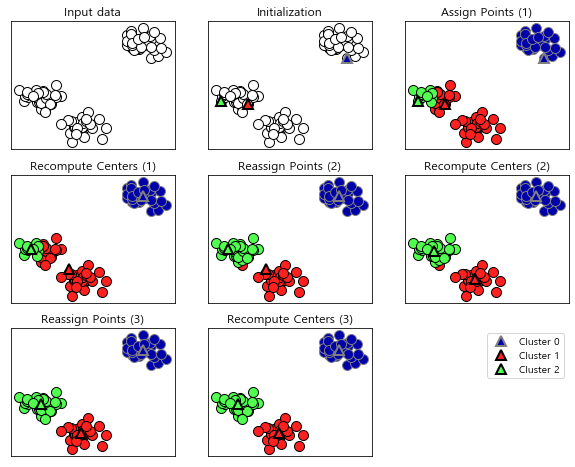

In [40]:
mglearn.plots.plot_kmeans_algorithm()

In [41]:
from sklearn.cluster import KMeans

In [44]:
X, y = sklearn.datasets.make_blobs()

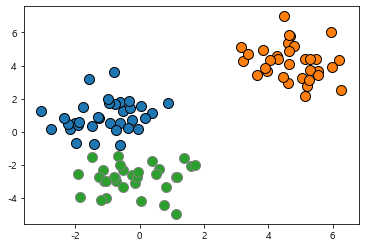

In [45]:
mglearn.discrete_scatter(X[:,0],X[:,1],y,markers="o")

In [47]:
km = KMeans(n_clusters=3).fit(X)

In [51]:
lbl = km.labels_

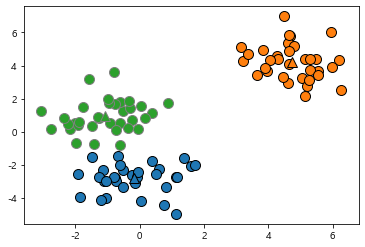

In [52]:
mglearn.discrete_scatter(X[:,0],X[:,1],lbl,markers="o")
mglearn.discrete_scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
                        [0,1,2],markers="^")

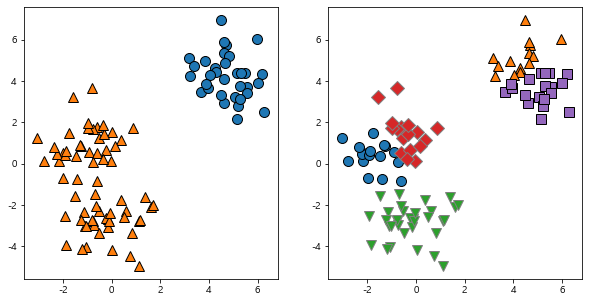

In [54]:
fig, axes = plt.subplots(1,2,figsize = (10,5))

idx = 0
for k in [2,5]:
    km = KMeans(n_clusters = k).fit(X)
    lbl = km.labels_
    mglearn.discrete_scatter(X[:,0],X[:,1],lbl,ax=axes[idx])
    idx += 1
    

In [55]:
KMeans().fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [77]:
iris = sklearn.datasets.load_iris()
X = pd.DataFrame(iris.data, columns = ["sepal_length","sepal_width",
                                      "petal_length","petal_width"])
y = pd.DataFrame(iris.target, columns = ["target"])

X.head()
y.head()

,target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, '꽃잎')

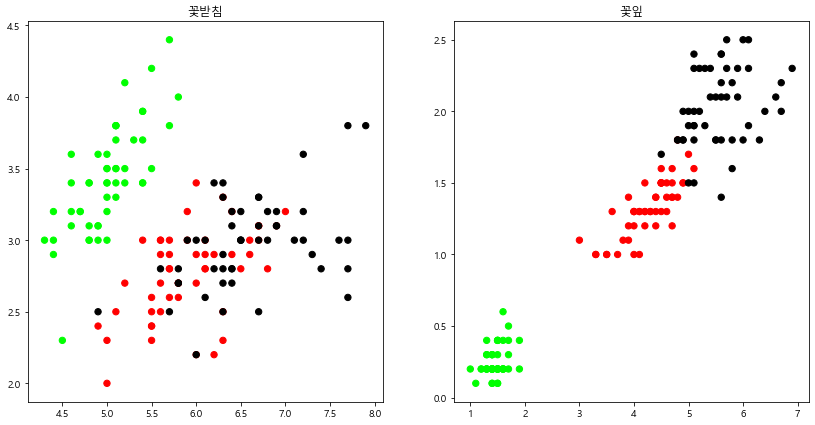

In [78]:
plt.figure(figsize = (14,7))
colormap = np.array(["lime","red","black"])
plt.subplot(1,2,1)
plt.scatter(X.sepal_length, X.sepal_width, c=colormap[y.target], 
           s=40)
plt.title("꽃받침")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], 
           s=40)
plt.title("꽃잎")

In [79]:
model = KMeans(n_clusters = 3).fit(X)

In [80]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, '결과')

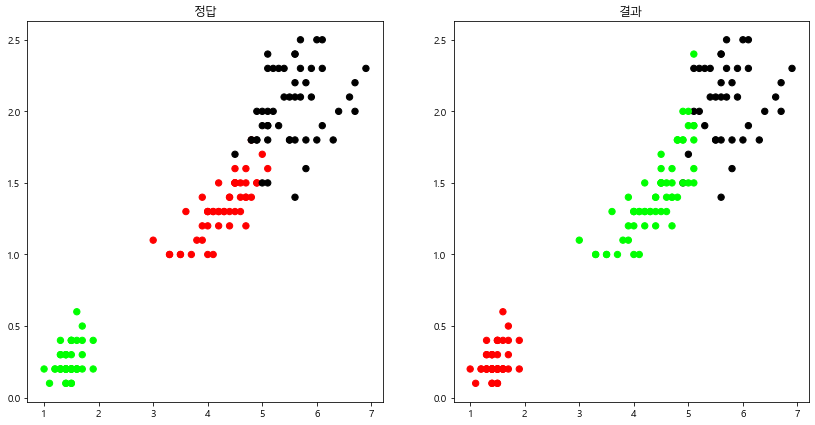

In [81]:
plt.figure(figsize = (14,7))
colormap = np.array(["lime","red","black"])
plt.subplot(1,2,1)
plt.scatter(X.petal_length, X.petal_width, c=colormap[y.target], 
           s=40)
plt.title("정답")

plt.subplot(1,2,2)
plt.scatter(X.petal_length, X.petal_width, c=colormap[model.labels_], 
           s=40)
plt.title("결과")

In [87]:
accuracy_score(y, model.labels_)

0.24

In [88]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, model.labels_)

array([[ 0, 50,  0],
       [48,  0,  2],
       [14,  0, 36]], dtype=int64)

In [89]:
# 사람의 키와 몸무게

In [93]:
df = pd.DataFrame(columns = ["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

In [95]:
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


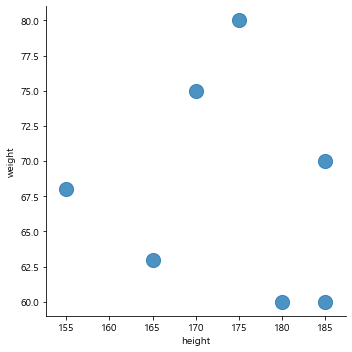

In [96]:
sns.lmplot("height","weight",data = df, fit_reg = False, scatter_kws = 
          {"s":200})

In [97]:
model = KMeans(n_clusters=3).fit(df.values)
df["label"] = model.labels_
df

,height,weight,label
0,185,60,2
1,180,60,2
2,185,70,2
3,165,63,1
4,155,68,1
5,170,75,0
6,175,80,0


## 사례 : 타이타닉을 이용한 분류 알고리즘 성능 비교

#### 부제 : 캐글 제출용

http://www.kaggle.com/c/titanic

### 1. Collecting the data 

In [167]:
train = pd.read_csv("titanic/train.csv")
test = pd.read_csv("titanic/test.csv")

In [168]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2.Exploratory Data Analysis

In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info())

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

In [172]:
"""
- Pclass
- Sex
- SibSp 
- Parch 
- Embarked 
    C = Cherbourg, Q = Queenstown, S = Southamption
- Cabin 
"""

def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind = "bar",stacked = True, figsize=(10,5))

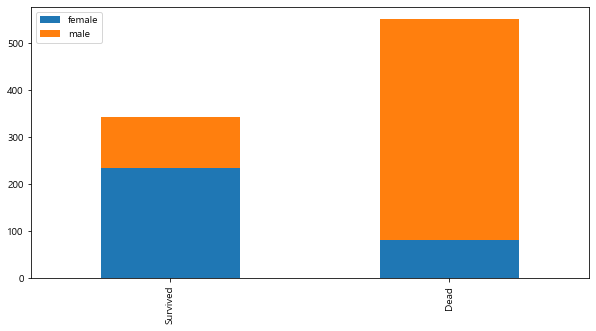

In [173]:
bar_chart("Sex")

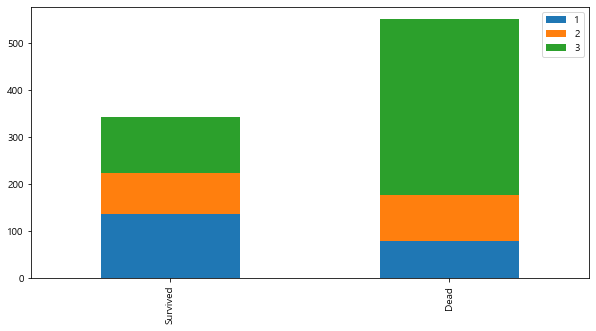

In [174]:
bar_chart("Pclass")

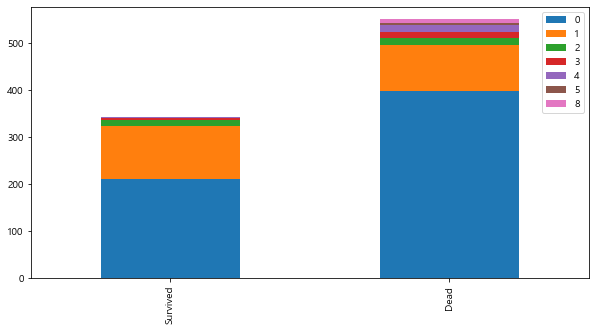

In [175]:
bar_chart("SibSp")

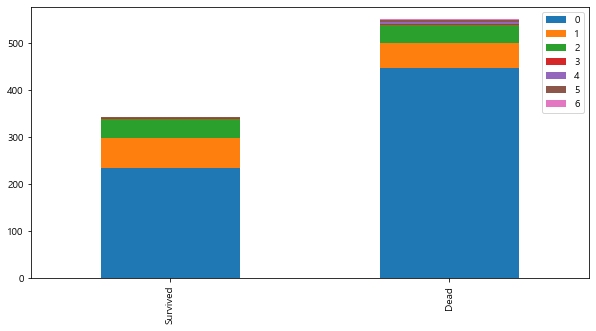

In [176]:
bar_chart("Parch")

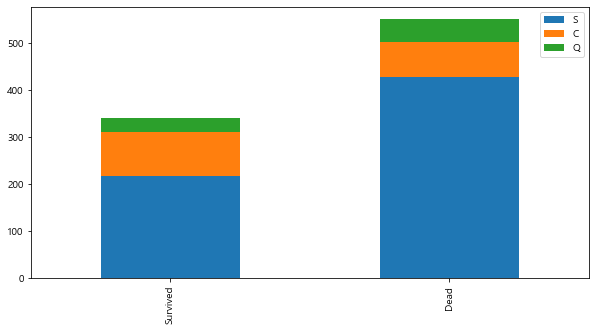

In [177]:
bar_chart("Embarked")

### 3.Feature Engineering

In [178]:
# Name : Mr, Mrs, Miss 를 추출
train_test_data = [train, test]
# 공백 + ()어떤한문자이상 )

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-za-z]+)\.',expand = False)

In [179]:
print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Ms            1
Don           1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Capt          1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


In [180]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3,'Dona':3, 'Mme':3, 'Jonkheer': 3, 'Countess': 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

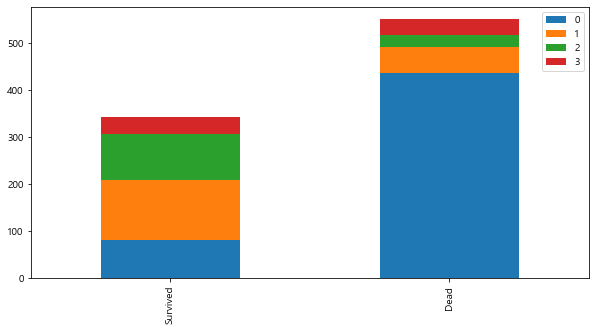

In [181]:
bar_chart("Title")

In [182]:
train.drop('Name',axis=1,inplace =True) #이름 열 다삭제
test.drop('Name',axis = 1, inplace = True) # 이름열 다삭제

In [183]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [184]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({"male":0, "female":1})

In [185]:
train.head()
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2


## Sex 데이터의 인코딩

In [186]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


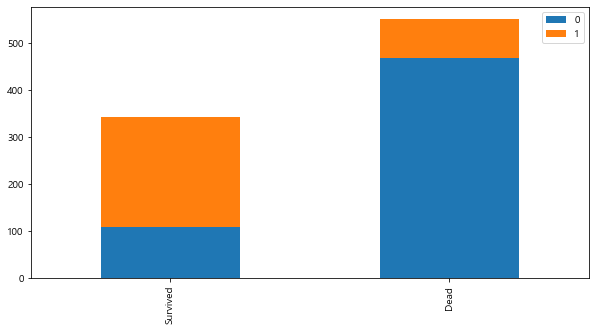

In [187]:
bar_chart('Sex')

# Age 데이터의 bining
- child :0, young:1, adult:2, mid-age:3, senior:4

In [188]:
train.isnull().sum()
# test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [189]:
# 결측치 처리 : 남자들은 Mr의 평균나이, Mrs는 Mrs의 평균나이, Miss 는 Miss의 평균나이
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

In [190]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3,
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [191]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [192]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [193]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [194]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [195]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map({'S':0,'C':1,'Q':2})

In [196]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [197]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

# Fare

In [198]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [199]:
test["Fare"].isnull().sum()

0

In [200]:
test.isnull().sum()


PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Title            0
dtype: int64

In [201]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [202]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


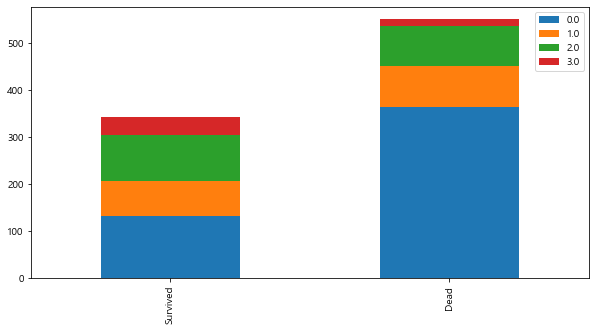

In [203]:
bar_chart("Fare")

In [204]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
E12            1
D21            1
B82 B84        1
D15            1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [205]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [208]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

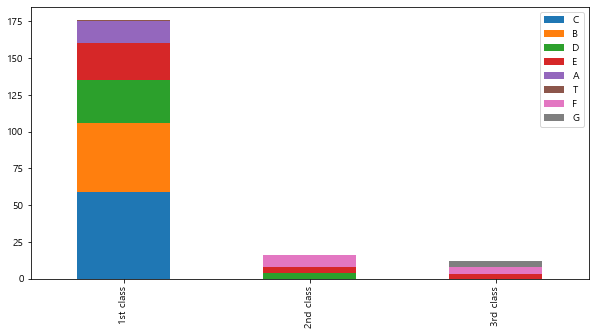

In [209]:
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [210]:
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [222]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [223]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,1.0,0.0,2.0,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,2.0,0,0,1


# 동승자 컬럼 합치기

In [224]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

KeyError: 'SibSp'

In [225]:
train['FamilySize'].value_counts()
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [215]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [216]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,NaN,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,1.0,0.0,NaN,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,NaN,0,0,1


In [217]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [218]:
train_data.shape, target.shape

((891, 8), (891,))

In [226]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,NaN,0,0,2
1,1,1,3.0,2.0,0.8,1,2,2
2,3,1,1.0,0.0,NaN,0,1,1
3,1,1,2.0,2.0,0.8,0,2,2
4,3,0,2.0,0.0,NaN,0,0,1
5,3,0,2.0,0.0,NaN,2,0,1
6,1,0,3.0,2.0,1.6,0,0,1
7,3,0,0.0,1.0,NaN,0,3,5
8,3,1,2.0,0.0,NaN,0,2,3
9,2,1,0.0,2.0,NaN,1,2,2


In [227]:
train_data.to_csv("titanic/train_data.csv", index = False)
target.to_csv("titanic/target.csv",index = False)